# IMPORT LIBRARIES

In [1]:
import seaborn as sns
import numpy
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import networkx as nx
%matplotlib inline

# SAVING TEXT FILE IN DATAFRAME


In [2]:
with open('Evergrande.txt', 'r') as f:
 ebook = []
 for line in f:
    for word in line.split():
        ebook.append("".join(word))
        print(word)

ï»¿Evergrande's
unraveling
is
still
commanding
global
attention,
but
its
troubles
are
part
of
a
much
bigger
problem.
For
weeks,
the
ailing
Chinese
real
estate
conglomerate
has
made
headlines
as
investors
wait
to
see
what
will
happen
to
its
enormous
mountain
of
debt.
As
the
slow-moving
crisis
unfolds,
analysts
are
pointing
to
a
deeper
underlying
issue:
China's
property
market
is
cooling
off
after
years
of
oversupply.
The
warning
signs
have
been
flashing
for
some
time.
Prior
to
Evergrande's
meltdown,
tens
of
millions
of
apartments
were
thought
to
be
sitting
empty
across
the
country.
In
recent
years,
the
problem
has
only
gotten
worse.
Mark
Williams,
chief
Asia
economist
at
Capital
Economics,
estimates
that
China
still
has
about
30
million
unsold
properties,
which
could
house
80
million
people.
That's
nearly
the
entire
population
of
Germany.
On
top
of
that,
about
100
million
properties
have
likely
been
bought
but
not
occupied,
which
could
accommodate
roughly
260
million
people,
according
t

# STORING EXTRACTED WORDS IN DATAFRAME

In [3]:
ebook2 = pd.DataFrame(ebook, columns= ['Text'])
ebook2

,Text
0,ï»¿Evergrande's
1,unraveling
2,is
3,still
4,commanding
...,...
590,impact
591,"buyers,"
592,according
593,to


# CALCULATING SUBJECTIVITY AND POLARITY TO UNDERSTAND
# EMOTIONS IN FILE

# FUNCTION FOR SUBJECTIVITY

In [4]:
from textblob import TextBlob as TB

In [5]:
def calc_subject(Text):
    return TB(Text).sentiment.subjectivity

# FUNCTION FOR POLARITY

In [6]:
def cal_plolarity(Text):
    return TB(Text).sentiment.polarity

In [7]:
ebook2['Subjectivity'] = ebook2.Text.apply(calc_subject)
ebook2['Polarity'] = ebook2.Text.apply(cal_plolarity)
## Checking on dataset
ebook2.head(30)

,Text,Subjectivity,Polarity
0,ï»¿Evergrande's,0.0,0.0
1,unraveling,0.0,0.0
2,is,0.0,0.0
3,still,0.0,0.0
4,commanding,0.0,0.0
5,global,0.0,0.0
6,"attention,",0.0,0.0
7,but,0.0,0.0
8,its,0.0,0.0
9,troubles,0.0,0.0


# SEGREGATING TEXTS ON THE BASIS OF THEIR
# SENTIMENTS(POLARITY)

In [8]:
def sentiment(polarity):
    result = ''
 
    if polarity > 0:
        result = 'Positive'
    
    elif polarity == 0:
        result = 'Netural'
    
    else:
        result = 'Negative'
    return result

ebook2['Analysis'] = ebook2.Polarity.apply(sentiment)
ebook2.head(30)


,Text,Subjectivity,Polarity,Analysis
0,ï»¿Evergrande's,0.0,0.0,Netural
1,unraveling,0.0,0.0,Netural
2,is,0.0,0.0,Netural
3,still,0.0,0.0,Netural
4,commanding,0.0,0.0,Netural
5,global,0.0,0.0,Netural
6,"attention,",0.0,0.0,Netural
7,but,0.0,0.0,Netural
8,its,0.0,0.0,Netural
9,troubles,0.0,0.0,Netural


# EDA

# DATA VISUALIZATION ON SENTIMENTS

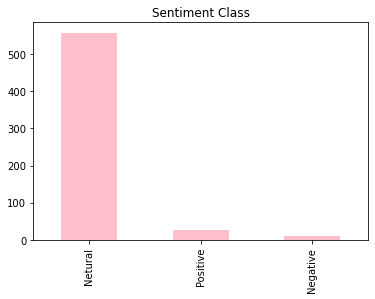

In [9]:
ebook2.Analysis.value_counts().plot(kind = 'bar', color = 'pink')
plt.title('Sentiment Class')
plt.show()

Text(0, 0.5, 'Subjectivity')

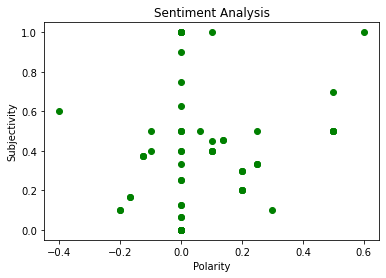

In [10]:
plt.scatter(ebook2.Polarity, ebook2.Subjectivity, color = 'green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# PERCENTAGE OF DIFFERENT SENTIMENT'S CLASS

In [11]:
# Create
File_sentiment = pd.DataFrame(ebook2.Analysis.value_counts(normalize=True)*100)
# Calculating total count of setiments
File_sentiment['Total'] = ebook2.Analysis.value_counts()
File_sentiment

,Analysis,Total
Netural,93.613445,557
Positive,4.705882,28
Negative,1.680672,10


In [12]:
from wordcloud import WordCloud as WC

In [13]:
# Load Stop Words
nltk.download('stopwords')
st_wd = set(nltk.corpus.stopwords.words('english'))
# Combining all texts
every_word = ' '.join([txts for txts in ebook2['Text']])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# WordCloud Function

In [14]:
def Word_cloud(data, mask=None):
    Cloud = WC(scale=3,
                     random_state=21,
                    colormap='autumn',
                    mask=mask,
                    stopwords=st_wd,
                    collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.show()

# WordCloud

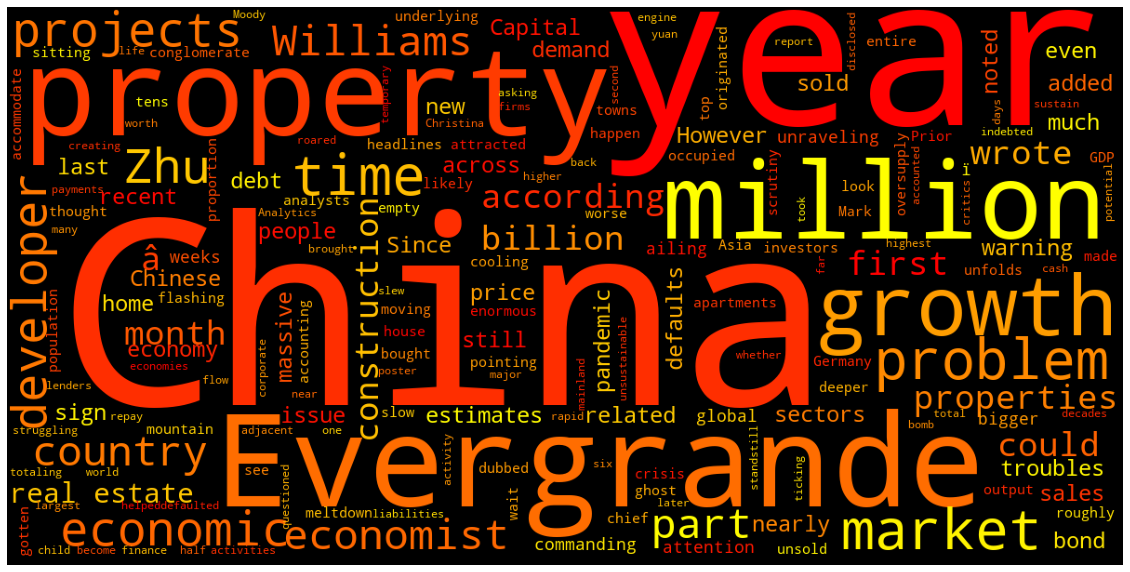

In [15]:
Word_cloud(every_word)

# TF-ITF
# Term Frequency(TF), you just count the number of words occurred in each
# document.
# IDF(Inverse Document Frequency) measures the amount of information a given
# word provides across the document.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
text_data = np.array(ebook)
feature_matrix = tfidf.fit_transform(text_data)
feature_matrix.toarray()
# Show tf-idf feature matrix
tfidf.get_feature_names()

['100',
 '12',
 '18',
 '19',
 '20',
 '2020',
 '260',
 '30',
 '300',
 '80',
 '90',
 'about',
 'accommodate',
 'according',
 'accounted',
 'accounting',
 'across',
 'activities',
 'activity',
 'added',
 'adjacent',
 'after',
 'again',
 'ailing',
 'all',
 'an',
 'analysts',
 'analytics',
 'and',
 'any',
 'apartments',
 'are',
 'as',
 'asia',
 'asking',
 'at',
 'attention',
 'attracted',
 'august',
 'back',
 'be',
 'because',
 'become',
 'been',
 'before',
 'being',
 'bigger',
 'billion',
 'bomb',
 'bond',
 'bought',
 'brief',
 'brought',
 'builders',
 'but',
 'buyers',
 'by',
 'called',
 'capital',
 'cash',
 'chief',
 'child',
 'china',
 'chinese',
 'christina',
 'commanding',
 'compared',
 'completed',
 'conglomerate',
 'considerably',
 'construction',
 'cooling',
 'corporate',
 'could',
 'country',
 'creating',
 'crisis',
 'critics',
 'days',
 'debt',
 'decades',
 'decline',
 'deeper',
 'defaulted',
 'defaults',
 'demand',
 'developer',
 'developers',
 'directly',
 'disclosed',
 'droppe

# FREQUENCY DISTRIBUTION PLOT

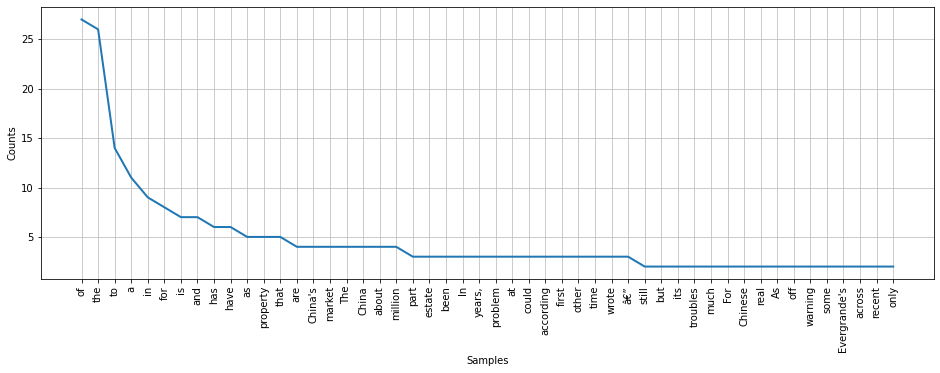

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
from nltk.probability import FreqDist
fqdist = FreqDist(ebook)
freqdist = nltk.FreqDist(ebook)
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# MOST FREQUENT 10 WORDS IN ALL TEXT

In [19]:
freqdist.most_common(10)

[('of', 27),
 ('the', 26),
 ('to', 14),
 ('a', 11),
 ('in', 9),
 ('for', 8),
 ('is', 7),
 ('and', 7),
 ('has', 6),
 ('have', 6)]

# DRAW A BAR CHART WITH THE COUNT OF THE MOST COMMON
# 20 WORDS

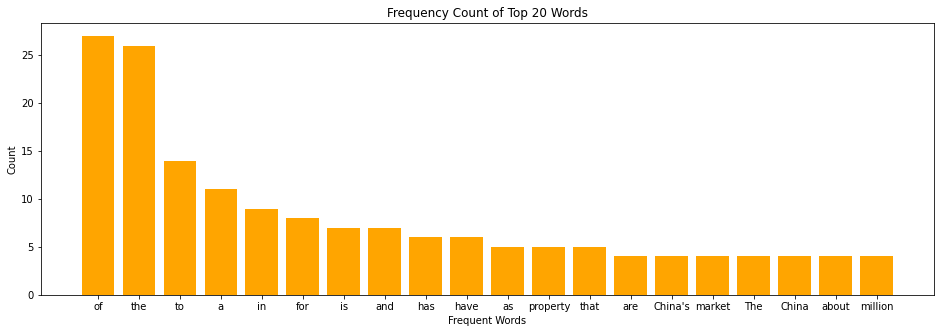

<Figure size 432x288 with 0 Axes>

In [20]:
x, y = zip(*freqdist.most_common(n=20))
plt.figure(figsize=(16,5))
plt.bar(range(len(x)), y, color = 'Orange', tick_label = y)
plt.xticks(range(len(x)), x)
plt.title('Frequency Count of Top 20 Words')
plt.xlabel('Frequent Words')
plt.ylabel('Count')
plt.show()
plt.savefig('Most Frequent 10 words.jpeg')

In [21]:
# Least common 5 words
freqdist.most_common()[-5:]

[('builders', 1),
 ('directly', 1),
 ('impact', 1),
 ('buyers,', 1),
 ('economists.', 1)]

In [22]:
# Get Bigrams from text
bigrams = nltk.bigrams(ebook)
# Calculate Frequency Distribution for Bigrams
freq_bi = nltk.FreqDist(bigrams)

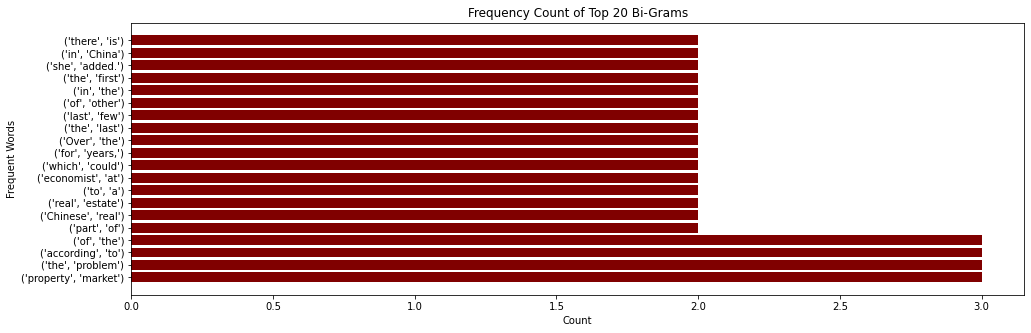

<Figure size 432x288 with 0 Axes>

In [23]:
# Draw a bar chart with the count of the most common 20 words
x,y = zip(*freq_bi.most_common(n=20))
plt.figure(figsize=(16,5))
plt.barh(range(len(x)), y, color = 'Maroon')
#plt.barh(x,range(len(x)), color = 'Orange', tick_label = y)
#plt.xticks(range(len(x)), x)
y_pos = np.arange(len(x))
plt.yticks(y_pos, x)
plt.title('Frequency Count of Top 20 Bi-Grams')
plt.ylabel('Frequent Words')
plt.xlabel('Count')
plt.show()
plt.savefig('Most Frequent 20 Bi-Grams.jpeg')

In [24]:
# Get Trigrams from text
trigrams = nltk.trigrams(ebook)
# Calculate Frequency Distribution for Bigrams
freq_tri = nltk.FreqDist(trigrams)
# Print and plot most common bigrams
freq_tri.most_common(20)


[(('Chinese', 'real', 'estate'), 2),
 (('Over', 'the', 'last'), 2),
 (('the', 'last', 'few'), 2),
 (('in', 'the', 'first'), 2),
 (("ï»¿Evergrande's", 'unraveling', 'is'), 1),
 (('unraveling', 'is', 'still'), 1),
 (('is', 'still', 'commanding'), 1),
 (('still', 'commanding', 'global'), 1),
 (('commanding', 'global', 'attention,'), 1),
 (('global', 'attention,', 'but'), 1),
 (('attention,', 'but', 'its'), 1),
 (('but', 'its', 'troubles'), 1),
 (('its', 'troubles', 'are'), 1),
 (('troubles', 'are', 'part'), 1),
 (('are', 'part', 'of'), 1),
 (('part', 'of', 'a'), 1),
 (('of', 'a', 'much'), 1),
 (('a', 'much', 'bigger'), 1),
 (('much', 'bigger', 'problem.'), 1),
 (('bigger', 'problem.', 'For'), 1)]

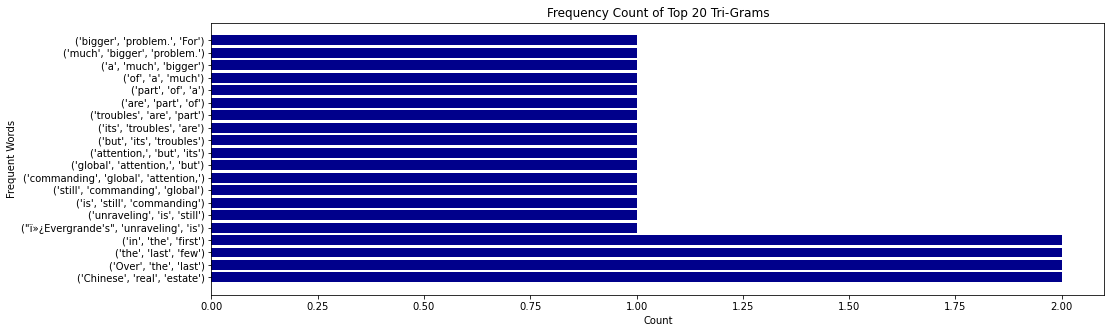

<Figure size 432x288 with 0 Axes>

In [25]:
# Draw a bar chart with the count of the most common 50 words
x,y = zip(*freq_tri.most_common(n=20))
plt.figure(figsize=(16,5))
plt.barh(range(len(x)), y, color = 'Darkblue')
#plt.barh(x,range(len(x)), color = 'Orange', tick_label = y)
#plt.xticks(range(len(x)), x)
y_pos = np.arange(len(x))
plt.yticks(y_pos, x)
plt.title('Frequency Count of Top 20 Tri-Grams')
plt.ylabel('Frequent Words')
plt.xlabel('Count')
plt.show()
plt.savefig('Most Frequent 20 Tri-Grams.jpeg')


# WORD LENGTH DISTRIBUTION PLOT
# This plot is word length on x-axis vs number of words of that length on the y-axis. This plot helps to
# visualise the composition

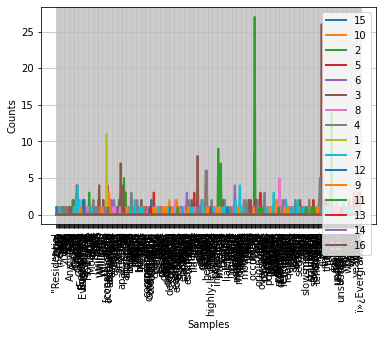

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
from nltk.probability import ConditionalFreqDist
cfdist = ConditionalFreqDist((len(word), word) for word in ebook )
cfdist.plot()

# T-SNE CORPUS VISUALIZATION
# Visualizing document similarity is to use t-distributed stochastic neighbor
# embedding

In [27]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(ebook)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


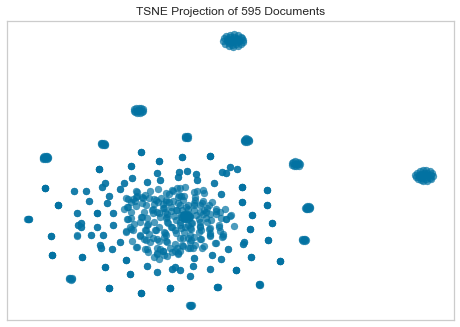

In [28]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts= cv.fit_transform(ebook2)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Subjectivity', ylabel='Density'>

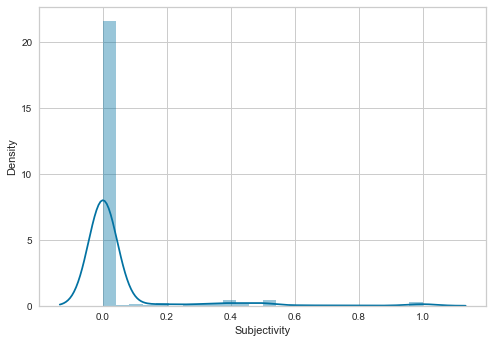

In [29]:
sns.distplot(ebook2['Subjectivity'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polarity', ylabel='Density'>

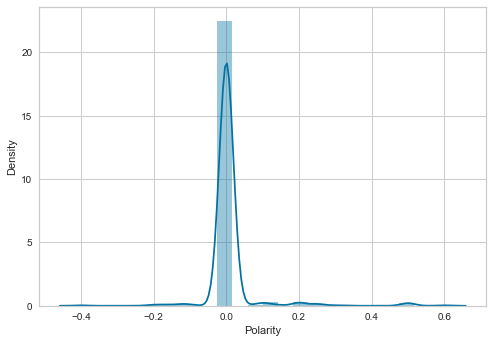

In [30]:
sns.distplot(ebook2['Polarity'])

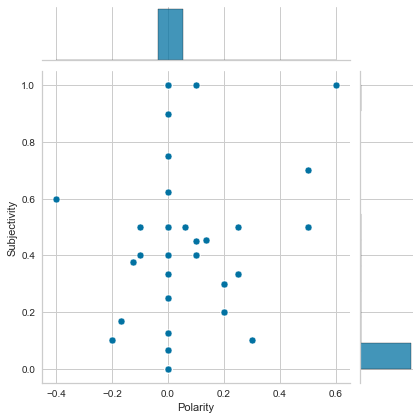

In [31]:
sns.jointplot(x='Polarity',y='Subjectivity',data=ebook2,kind='scatter')

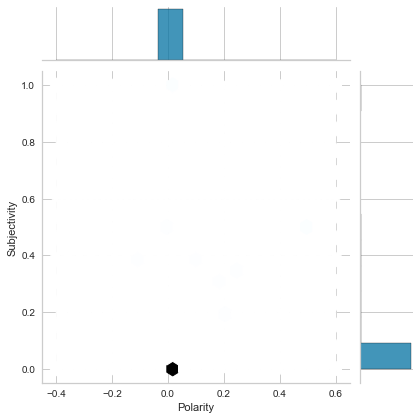

In [32]:
sns.jointplot(x='Polarity',y='Subjectivity',data=ebook2,kind='hex')

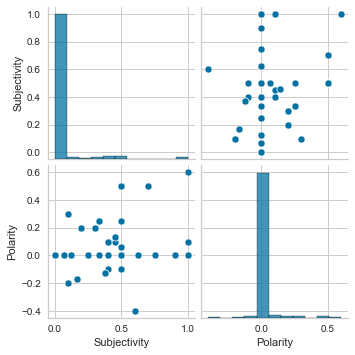

In [33]:
sns.pairplot(ebook2)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


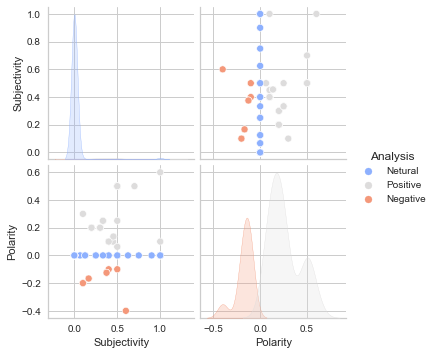

In [34]:
sns.pairplot(ebook2,hue='Analysis',palette='coolwarm')

<AxesSubplot:xlabel='Polarity'>

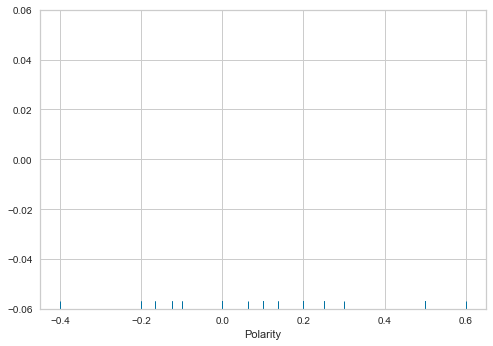

In [35]:
sns.rugplot(ebook2['Polarity'])

<AxesSubplot:xlabel='Analysis', ylabel='Polarity'>

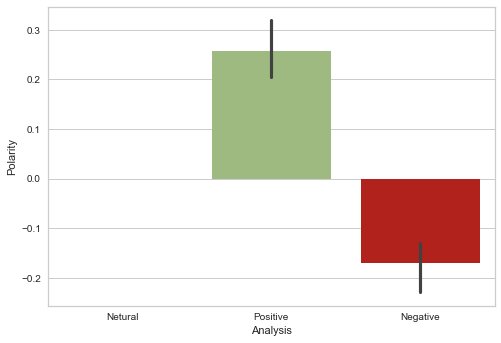

In [36]:
sns.barplot(x='Analysis',y='Polarity',data=ebook2)

<AxesSubplot:xlabel='Analysis', ylabel='Polarity'>

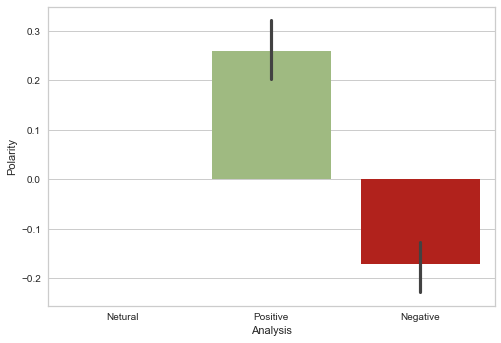

In [37]:
sns.barplot(x = 'Analysis', y = 'Polarity', data = ebook2)

<AxesSubplot:xlabel='Analysis', ylabel='Subjectivity'>

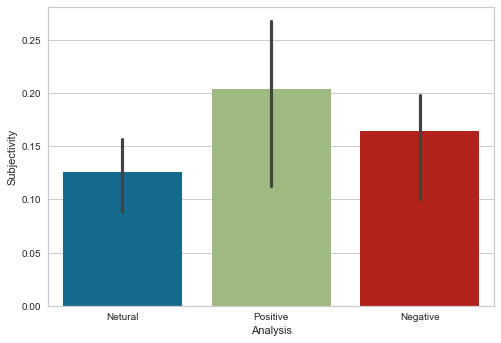

In [38]:
sns.barplot(x='Analysis',y='Subjectivity',data=ebook2,estimator=np.std)

<AxesSubplot:xlabel='Polarity', ylabel='Analysis'>

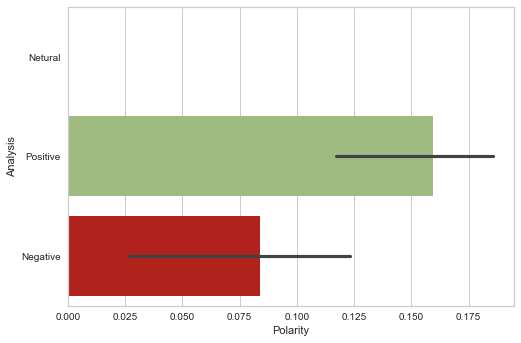

In [39]:
sns.barplot(x = 'Polarity', y = 'Analysis', data = ebook2, estimator= np.std)

<AxesSubplot:xlabel='Text', ylabel='count'>

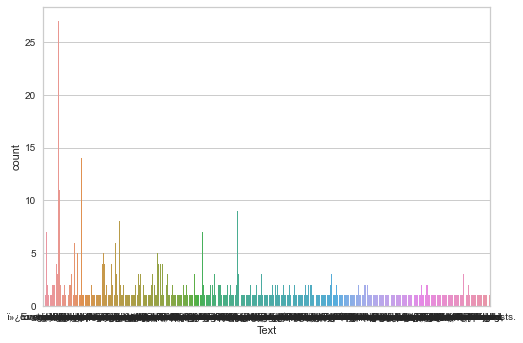

In [40]:
sns.countplot(x='Text',data=ebook2)

<AxesSubplot:xlabel='Analysis', ylabel='count'>

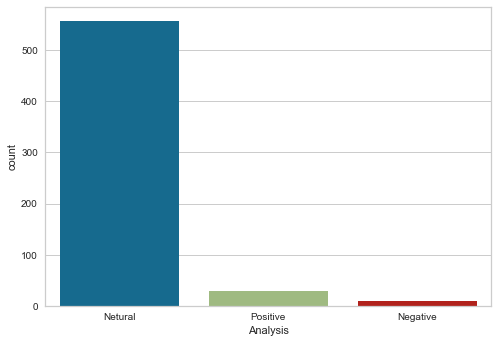

In [41]:
sns.countplot(x = 'Analysis', data= ebook2)

<AxesSubplot:xlabel='Analysis', ylabel='Subjectivity'>

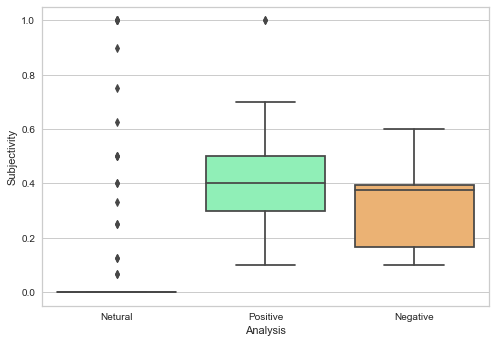

In [42]:
sns.boxplot(x="Analysis", y="Subjectivity", data=ebook2,palette='rainbow')

<AxesSubplot:xlabel='Analysis', ylabel='Polarity'>

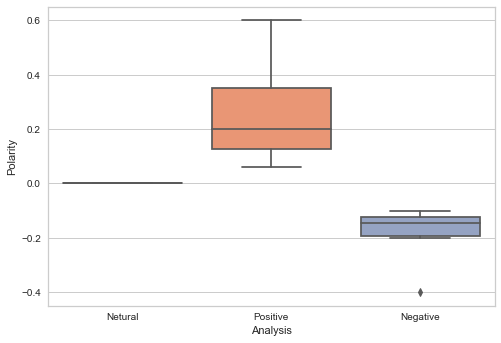

In [43]:
sns.boxplot(x='Analysis', y = 'Polarity', data = ebook2, palette= 'Set2')

<AxesSubplot:xlabel='Analysis', ylabel='Polarity'>

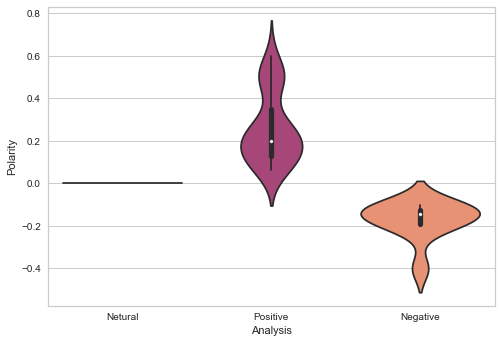

In [44]:
sns.violinplot(x="Analysis", y="Polarity", data=ebook2,palette='magma')

<AxesSubplot:xlabel='Analysis', ylabel='Subjectivity'>

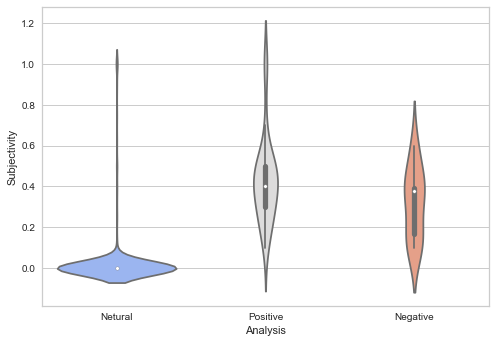

In [45]:
sns.violinplot(x = 'Analysis', y = 'Subjectivity', data = ebook2, palette='coolwarm')

<AxesSubplot:xlabel='Analysis', ylabel='Polarity'>

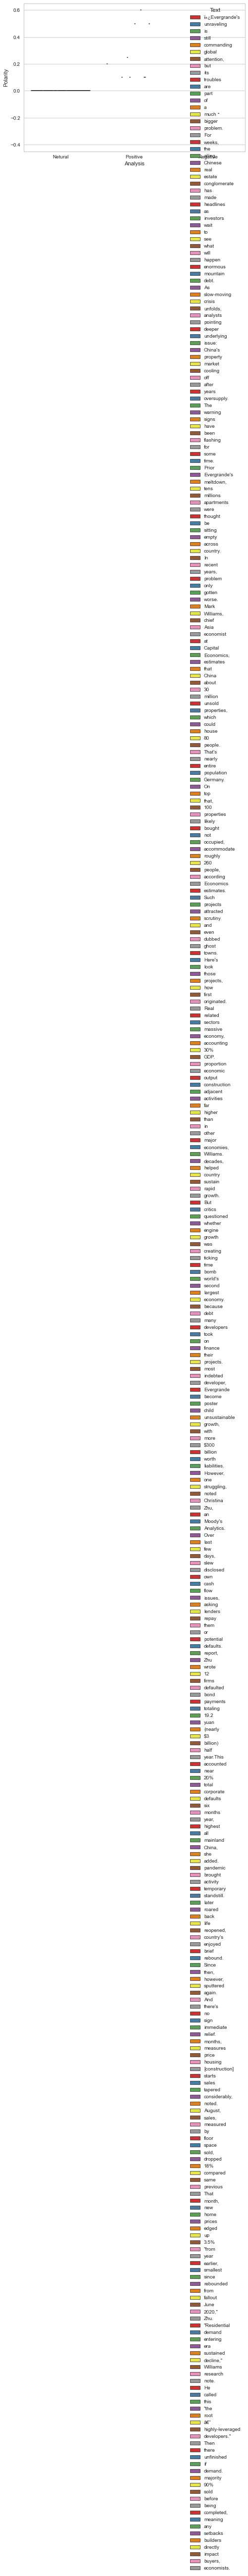

In [46]:
sns.violinplot(x="Analysis", y="Polarity", data=ebook2,hue='Text',palette='Set1')

<AxesSubplot:xlabel='Analysis', ylabel='Subjectivity'>

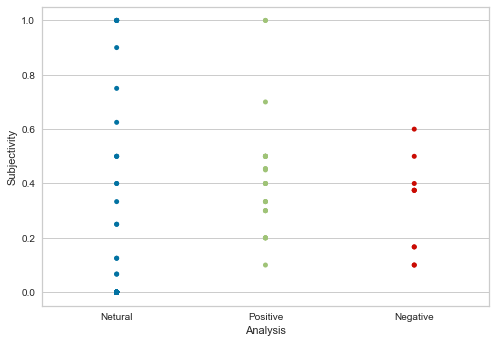

In [47]:
sns.stripplot(x="Analysis", y="Subjectivity", data=ebook2, jitter=False)

<AxesSubplot:xlabel='Analysis', ylabel='Polarity'>

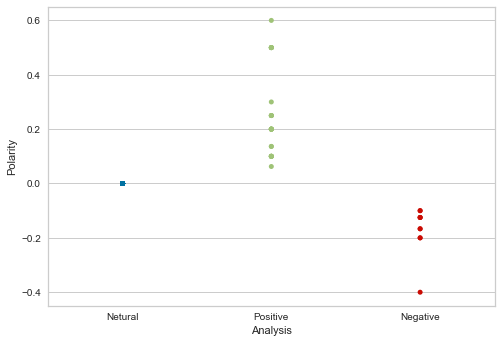

In [48]:
sns.stripplot(x="Analysis", y="Polarity", data=ebook2, jitter=False)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Analysis', ylabel='Subjectivity'>

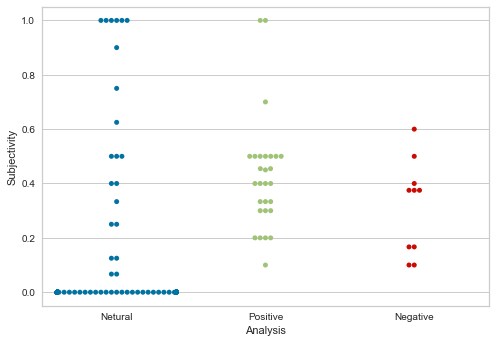

In [49]:
sns.swarmplot(x="Analysis", y="Subjectivity", data=ebook2)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Analysis', ylabel='Polarity'>

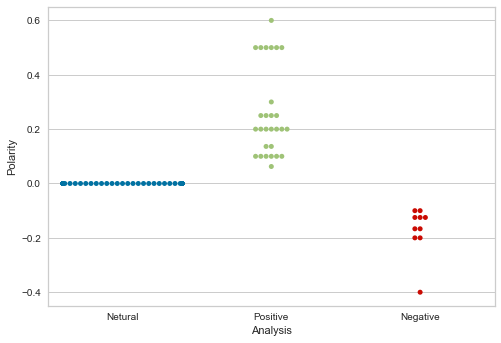

In [50]:
sns.swarmplot(x="Analysis", y="Polarity", data=ebook2)

<AxesSubplot:>

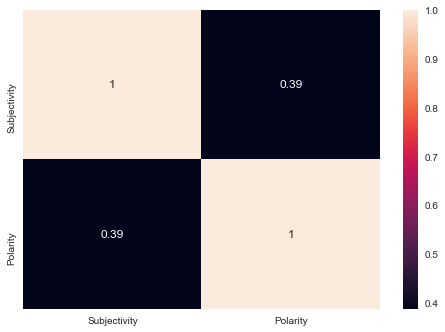

In [51]:
sns.heatmap(ebook2.corr(), annot= True)

In [52]:
ebook2.pivot_table(values='Subjectivity',index='Analysis',columns='Polarity')

Polarity,-0.400000,-0.200000,-0.166667,-0.125000,-0.100000,0.000000,0.062500,0.100000,0.136364,0.200000,0.250000,0.300000,0.500000,0.600000
Analysis,,,,,,,,,,,,,,
Negative,0.6,0.1,0.166667,0.375,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Netural,NaN,NaN,NaN,NaN,NaN,0.02117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Positive,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.508333,0.454545,0.242857,0.375,0.1,0.533333,1.0


<AxesSubplot:xlabel='Polarity', ylabel='Analysis'>

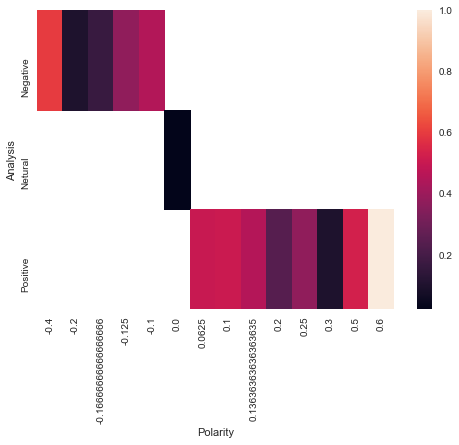

In [53]:
newebook2 = ebook2.pivot_table(values='Subjectivity',index='Analysis',columns='Polarity')
sns.heatmap(newebook2)

In [54]:
ebook2.pivot_table(values='Subjectivity',index='Text',columns='Polarity')

Polarity,-0.400000,-0.200000,-0.166667,-0.125000,-0.100000,0.000000,0.062500,0.100000,0.136364,0.200000,0.250000,0.300000,0.500000,0.600000
Text,,,,,,,,,,,,,,
"""Residential",NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""from",NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""the",NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$300,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
years,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"years,",NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yuan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Polarity', ylabel='Text'>

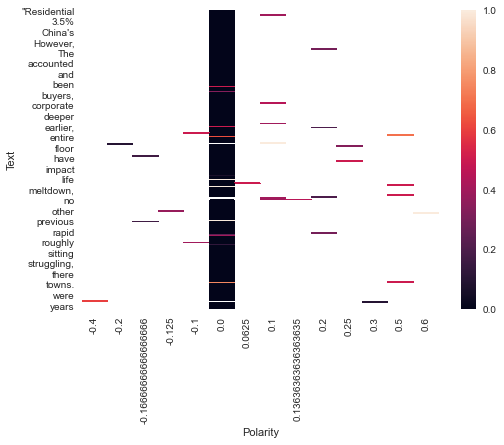

In [55]:
newebook3 = ebook2.pivot_table(values='Subjectivity',index='Text',columns='Polarity')
sns.heatmap(newebook3)

<AxesSubplot:xlabel='Polarity', ylabel='Analysis'>

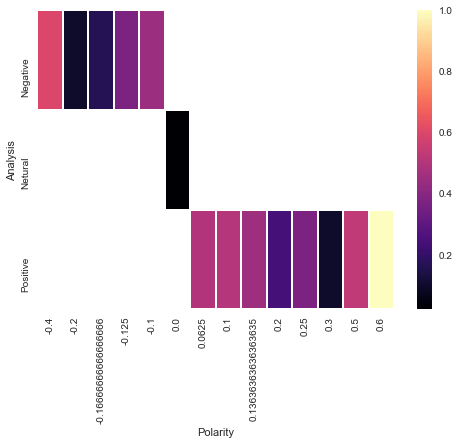

In [56]:
sns.heatmap(newebook2,cmap='magma',linecolor='white',linewidths=1)

<AxesSubplot:ylabel='Density'>

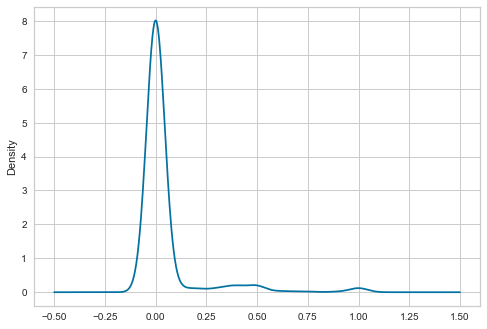

In [57]:
ebook2['Subjectivity'].plot.kde()

<AxesSubplot:ylabel='Density'>

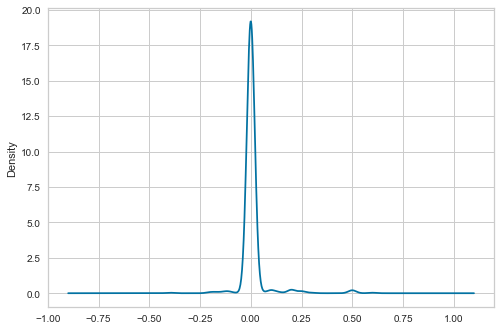

In [58]:
ebook2['Polarity'].plot.kde()

<AxesSubplot:ylabel='Density'>

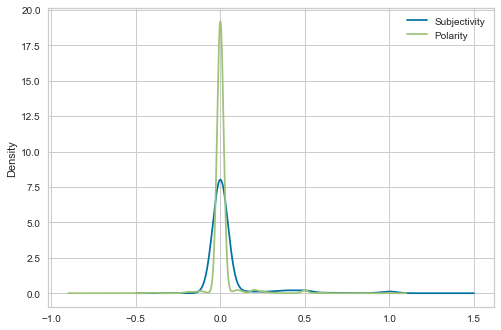

In [59]:
ebook2.plot.density()

# GETTING SENTENCES

In [60]:
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []
    
    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
 
    return sentences

# USING COSINE SIMILARITY TO FIND TWO SENTENCES

In [61]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
    
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
    
    all_words = list(set(sent1 + sent2))
    
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
         
    return 1 - cosine_distance(vector1, vector2)

# SIMILARITY MATRIX

In [62]:
def build_similarity_matrix(sentences, stop_words):
 # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
                if idx1 == idx2: #ignore if both are same sentences
                    continue
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

                return similarity_matrix


# GENERATING SUMMARY

In [63]:
def generate_summary(file_name, top_n=5):
    nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize text
    print("Summarize Text: \n", ". ".join(summarize_text))

In [64]:
generate_summary( "Evergrande.txt", 5)

ï»¿Evergrande's unraveling is still commanding global attention, but its troubles are part of a much bigger problem
For weeks, the ailing Chinese real estate conglomerate has made headlines as investors wait to see what will happen to its enormous mountain of debt
As the slow-moving crisis unfolds, analysts are pointing to a deeper underlying issue: China's property market is cooling off after years of oversupply
The warning signs have been flashing for some time
Prior to Evergrande's meltdown, tens of millions of apartments were thought to be sitting empty across the country
In recent years, the problem has only gotten worse
Mark Williams, chief Asia economist at Capital Economics, estimates that China still has about 30 million unsold properties, which could house 80 million people
That's nearly the entire population of Germany
On top of that, about 100 million properties have likely been bought but not occupied, which could accommodate roughly 260 million people, according to Capita

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
ebook2_analysis = ebook2[(ebook2.Analysis == 'Positive') | (ebook2.Analysis =='Negative') | (ebook2.Analysis == 'Neutral') ]

In [66]:
X = ebook2_analysis['Text']
y = ebook2_analysis['Analysis']

In [67]:
X.shape

(38,)

In [68]:
y.shape

(38,)

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [70]:
X = cv.fit_transform(X)

In [71]:
#TRAIN TEST SPLIT

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [74]:
#TRAINING A MODEL

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [76]:
nb.fit(X_train,y_train)

MultinomialNB()

In [77]:
#PREDICTIONS AND EVALUATIONS

In [78]:
predictions = nb.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 0  2]
 [ 0 10]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.83      1.00      0.91        10

    accuracy                           0.83        12
   macro avg       0.42      0.50      0.45        12
weighted avg       0.69      0.83      0.76        12



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
#BY USING TEXT PROCESSING

In [82]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [85]:
#USING THE PIPELINE
#Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text¶

In [86]:
#TRAIN TEST SPLIT

In [87]:
X = ebook2_analysis['Text']
y = ebook2_analysis['Analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [88]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [89]:
#PREDICTIONS AND EVALUATIONS

In [90]:
predictions = pipeline.predict(X_test)

In [91]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 0  2]
 [ 0 10]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.83      1.00      0.91        10

    accuracy                           0.83        12
   macro avg       0.42      0.50      0.45        12
weighted avg       0.69      0.83      0.76        12



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluation

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8333333333333334
[[ 0  2]
 [ 0 10]]


In [93]:
classifier = nb

In [94]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

# ASSIGN TARGET VARIABLE

In [95]:
#target = ebook2.Analysis
#ebook2 = ebook2.drop(['Analysis'], axis= 1)

In [96]:
#ebook2

In [97]:
#from scipy.stats import itemfreq
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer
#from sklearn.metrics import confusion_matrix
#import re

In [98]:
#lb = LabelEncoder()
#target = lb.fit_transform(target)

In [99]:
#target

In [100]:
# Importing modules
#import pandas as pd
#import os
#os.chdir('..')
# Read data into paper
#data= ebook2
# Print head
#data.head()

In [101]:
#data

In [102]:
# Load the regular expression library
#import re
# Remove punctuation
#data['Text'] = \
#data['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
#data['Text'] = \
#data['Text'].map(lambda x: x.lower())
# Print out the first rows of papers
#data['Text'].head()

In [103]:
# Import the wordcloud library
#from wordcloud import WordCloud
# Join the different processed titles together.
#long_string = ','.join(list(data['Text'].values))
# Create a WordCloud object
#wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
# Generate a word cloud
#wordcloud.generate(long_string)
# Visualize the word cloud
#wordcloud.to_image()

In [104]:
#import gensim
#from gensim.utils import simple_preprocess
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
#def sent_to_words(sentences):
#    for sentence in sentences:
#        # deacc=True removes punctuations
#        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
#def remove_stopwords(texts):
#    return [[word for word in simple_preprocess(str(doc)) 
#             if word not in stop_words] for doc in texts]
#data =ebook2.Text.values.tolist()
#data_words = list(sent_to_words(data))
# remove stop words
#data_words = remove_stopwords(data_words)
#print(data_words[:1][0][:60])

In [105]:
#import gensim.corpora as corpora
# Create Dictionary
#id2word = corpora.Dictionary(data_words)
# Create Corpus
#texts = data_words
# Term Document Frequency
#corpus = [id2word.doc2bow(text) for text in texts]
# View
#print(corpus[:1][0][:30])

In [106]:
#from pprint import pprint
# number of topics
#num_topics = 10
# Build LDA model
#lda_model = gensim.models.LdaMulticore(corpus=corpus,
 #                                      id2word=id2word,
  #                                     num_topics=num_topics)
# Print the Keyword in the 10 topics
#print(lda_model.print_topics())
#doc_lda = lda_model[corpus]

In [107]:
#!pip install pyLDAVis
#import pyLDAvis
#import pyLDAvis.gensim_models


#import pickle

#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) 


# Visualize the topics
#pyLDAvis.enable_notebook()
#LDAvis_data_filepath = os.path.join('data=ebook2'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1:
 #   LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
 #   with open(LDAvis_data_filepath, 'wb') as f:
                                                     
  #      pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
#    LDAvis_prepared = pickle.load(f)
#pyLDAvis.save_html(LDAvis_prepared, 'data=ebook2'+ str(num_topics) +'.html')
#LDAvis_prepared

In [108]:
#ebook2.info

In [109]:
#ebook2.Polarity.value_counts()

In [110]:
#Polarity_count=ebook2.groupby('Polarity').count()
#plt.bar(Polarity_count.index.values, Polarity_count['Text'])
#plt.xlabel('Review Polarity')
#plt.ylabel('Numberof Polarity')
#plt.show()

In [111]:
#from sklearn.feature_extraction.text import CountVectorizer
#from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
#token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
#text_counts= cv.fit_transform(ebook2['Text'])

# Split train and test set

In [112]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#    text_counts, ebook2['Text'], test_size=0.3, random_state=1)

# Model Building and Evaluation

In [113]:
#from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
#clf = MultinomialNB().fit(X_train, y_train)
#predicted= clf.predict(X_test)
#print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

# Feature Generation using TF-IDF

In [114]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tf=TfidfVectorizer()
#text_tf= tf.fit_transform(ebook2['Text'])

# Split train and test set (TF-IDF)

In [115]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
 #   text_tf, ebook2['Text'], test_size=0.3, random_state=123)

# Model Building and Evaluation (TF-IDF)

In [116]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
#clf = MultinomialNB().fit(X_train, y_train)
#predicted= clf.predict(X_test)
#print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

# PREDICTIONS AND EVALUATIONS

In [117]:
#from sklearn.naive_bayes import MultinomialNB
#nb = MultinomialNB()

In [118]:
#nb.fit(X_train,y_train)

In [119]:
#predictions = nb.predict(X_test)

In [120]:
#from sklearn.metrics import confusion_matrix,classification_report

In [121]:
#print(confusion_matrix(y_test,predictions))
#print('\n')
#print(classification_report(y_test,predictions))